<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/YB_5_16_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [34]:
# 데이터 로드
data = pd.read_csv("abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [35]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [36]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [37]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [38]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
ridge_predict = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
ridge_age = ridge_predict + 1.5

#MSE와 RMSE구하기
mse = mean_squared_error(y_test, ridge_predict)
rmse = np.sqrt(mse)
print(mse, rmse)


5.013158686100955 2.239008415817358


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [31]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [48]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_predict = ridge.predict(X_test)
    mse = mean_squared_error(y_test, ridge_predict)
    rmse = np.sqrt(mse)
    print(alpha, rmse)
  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

print(avg_rmse)

0 2.236928923256222
0.1 2.237472829455988
1 2.2455306987205312
10 2.3468324593231444
100 2.594562224639499
2.621188059927813


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [52]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor, plot_importance

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [55]:
#모델 생성 및 훈련
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

#예측값 구하기
xgb_predict = xgb.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
xgb_age = xgb_predict + 1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test, xgb_predict)
rmse = np.sqrt(mse)
print(mse, rmse)

5.454935073852539 2.335580243505356


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

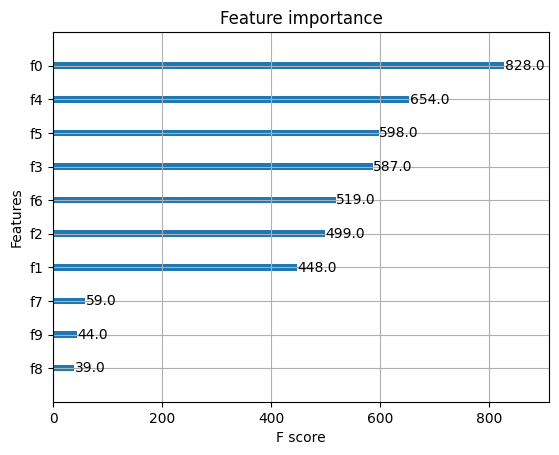

In [54]:
import seaborn as sns
%matplotlib inline

plot_importance(xgb)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [15]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [16]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [17]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [19]:
#기울기
lr.coef_

array([[-1.99751338e-01,  3.65451144e-01,  1.49472353e-01,
        -1.88027194e-01, -2.28494592e-02,  1.95456785e-01,
         4.66701970e-01, -1.66796877e-02,  8.23898405e-02,
         6.75013134e-02, -1.92622072e-02,  2.94916201e-01,
         7.42522347e-03],
       [ 5.96476523e-01, -7.88673910e-01, -1.26181652e-01,
         2.12254429e-01, -1.13504086e-02,  3.15786394e-01,
         3.55148523e-01,  3.34675938e-02,  2.79036084e-01,
        -1.17202662e+00,  2.61166065e-01,  4.64732238e-01,
        -8.33633769e-03],
       [-3.96725185e-01,  4.23222765e-01, -2.32907005e-02,
        -2.42272356e-02,  3.41998678e-02, -5.11243179e-01,
        -8.21850494e-01, -1.67879061e-02, -3.61425924e-01,
         1.10452531e+00, -2.41903857e-01, -7.59648438e-01,
         9.11114220e-04]])

In [20]:
#절편
lr.intercept_

array([-0.04177842,  0.09551058, -0.05373216])

3-3) 모델의 정확도를 구하세요.

In [21]:
#모델의 예측값 구하기
from sklearn.metrics import accuracy_score
lr_predict = lr.predict(x_test)

#모델의 정확도 구하기
accuracy = accuracy_score(y_test, lr_predict)
accuracy


0.9629629629629629